In [1]:
import os
import wfdb

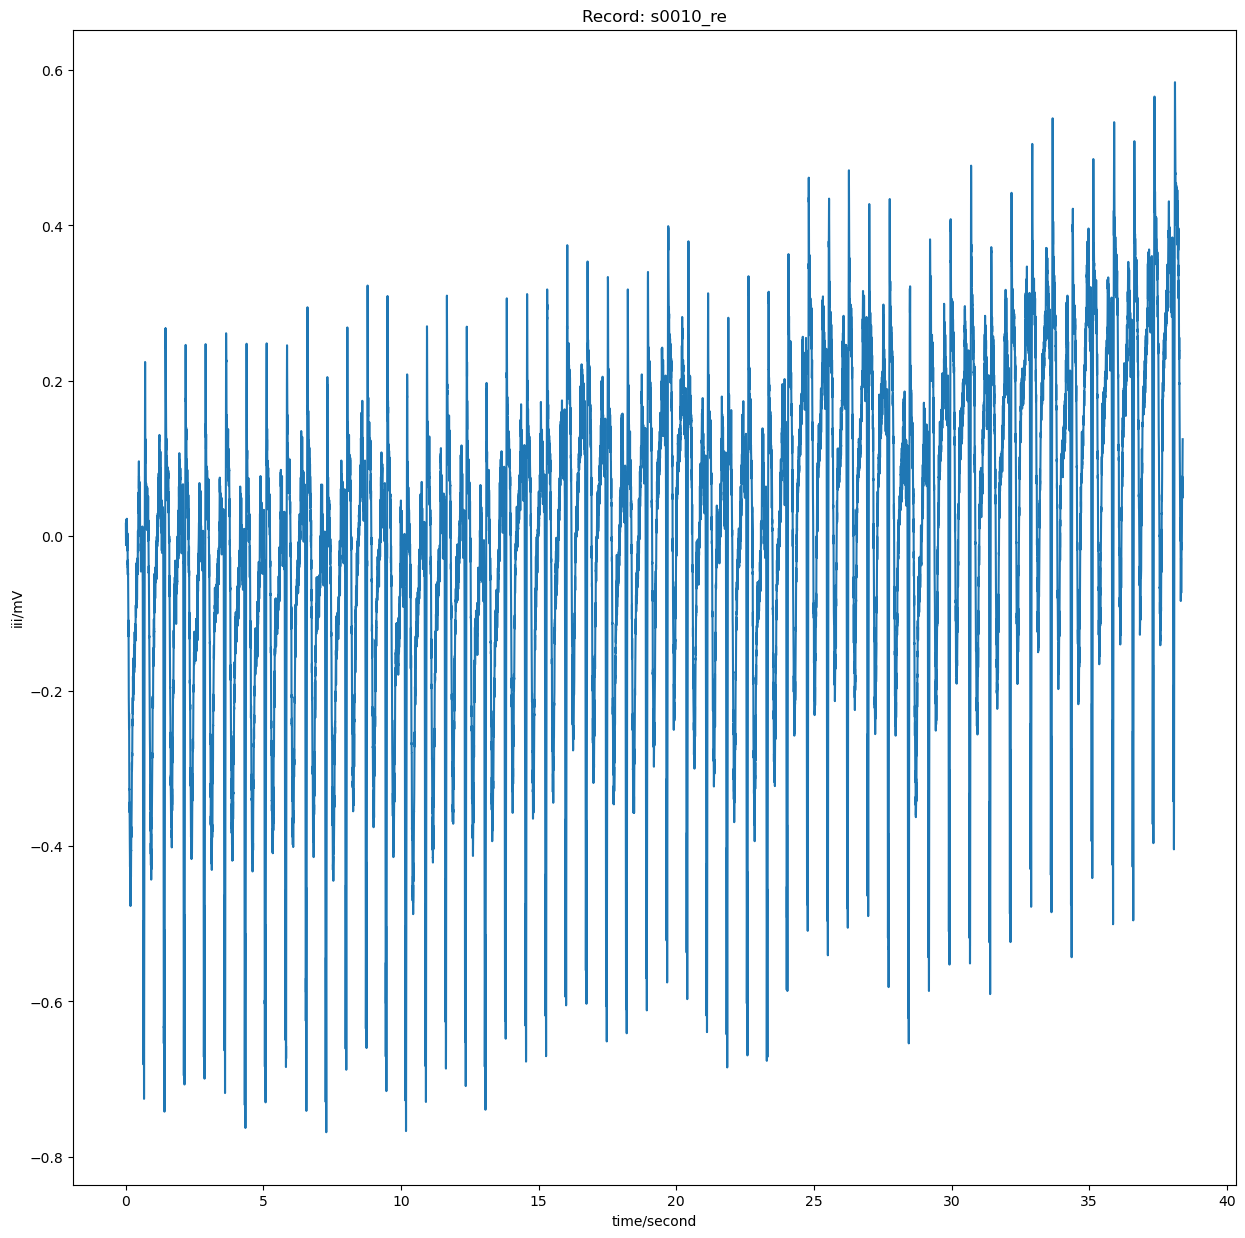

In [2]:
os.chdir('E:/ptb-diagnostic-ecg-database-1.0.0/patient001')
record = wfdb.rdrecord('s0010_re',channels=[2])
wfdb.plot_wfdb(record, figsize=(15,15))

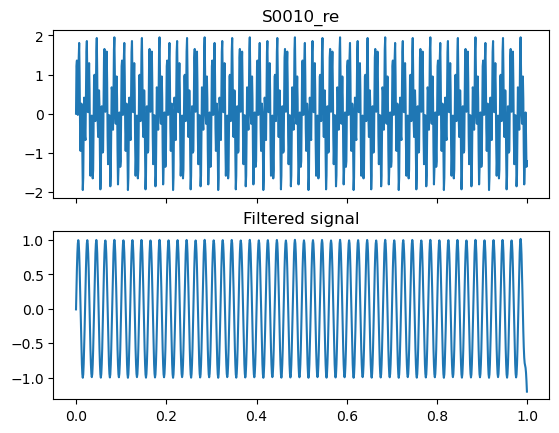

In [3]:
import numpy as np
from scipy import signal

# Define the sampling frequency and cutoff frequency
fs = 1000 # Hz
cutoff = 100 # Hz

# Calculate the normalized cutoff frequency
nyq = 0.5 * fs
normalized_cutoff = cutoff / nyq

# Create the Butterworth filter
order = 4 # Filter order
b, a = signal.butter(order, normalized_cutoff, btype='lowpass')

# Generate some sample data
t = np.linspace(0, 1, 1000, endpoint=False)
x = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 180 * t)

# Apply the filter to the data
filtered_signal = signal.filtfilt(b, a, x)

# Plot the original and filtered signals
import matplotlib.pyplot as plt
fig, (ax_orig, ax_filtered) = plt.subplots(2, 1, sharex=True)
ax_orig.plot(t, x)
ax_orig.set_title('S0010_re')
ax_filtered.plot(t, filtered_signal)
ax_filtered.set_title('Filtered signal')
plt.show()


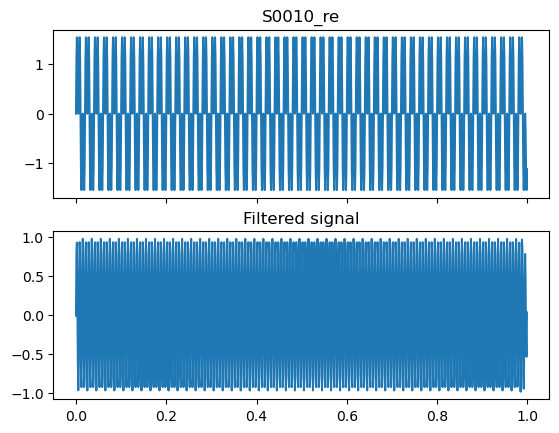

In [4]:
import numpy as np
from scipy import signal

# Define the sampling frequency and cutoff frequency
fs = 1000 # Hz
cutoff = 100 # Hz

# Calculate the normalized cutoff frequency
nyq = 0.5 * fs
normalized_cutoff = cutoff / nyq

# Create the Butterworth filter
order = 4 # Filter order
b, a = signal.butter(order, normalized_cutoff, btype='highpass')

# Generate some sample data
t = np.linspace(0, 1, 1000, endpoint=False)
x = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 150 * t)

# Apply the filter to the data
filtered_signal = signal.filtfilt(b, a, x)

# Plot the original and filtered signals
import matplotlib.pyplot as plt
fig, (ax_orig, ax_filtered) = plt.subplots(2, 1, sharex=True)
ax_orig.plot(t, x)
ax_orig.set_title('S0010_re')
ax_filtered.plot(t, filtered_signal)
ax_filtered.set_title('Filtered signal')
plt.show()


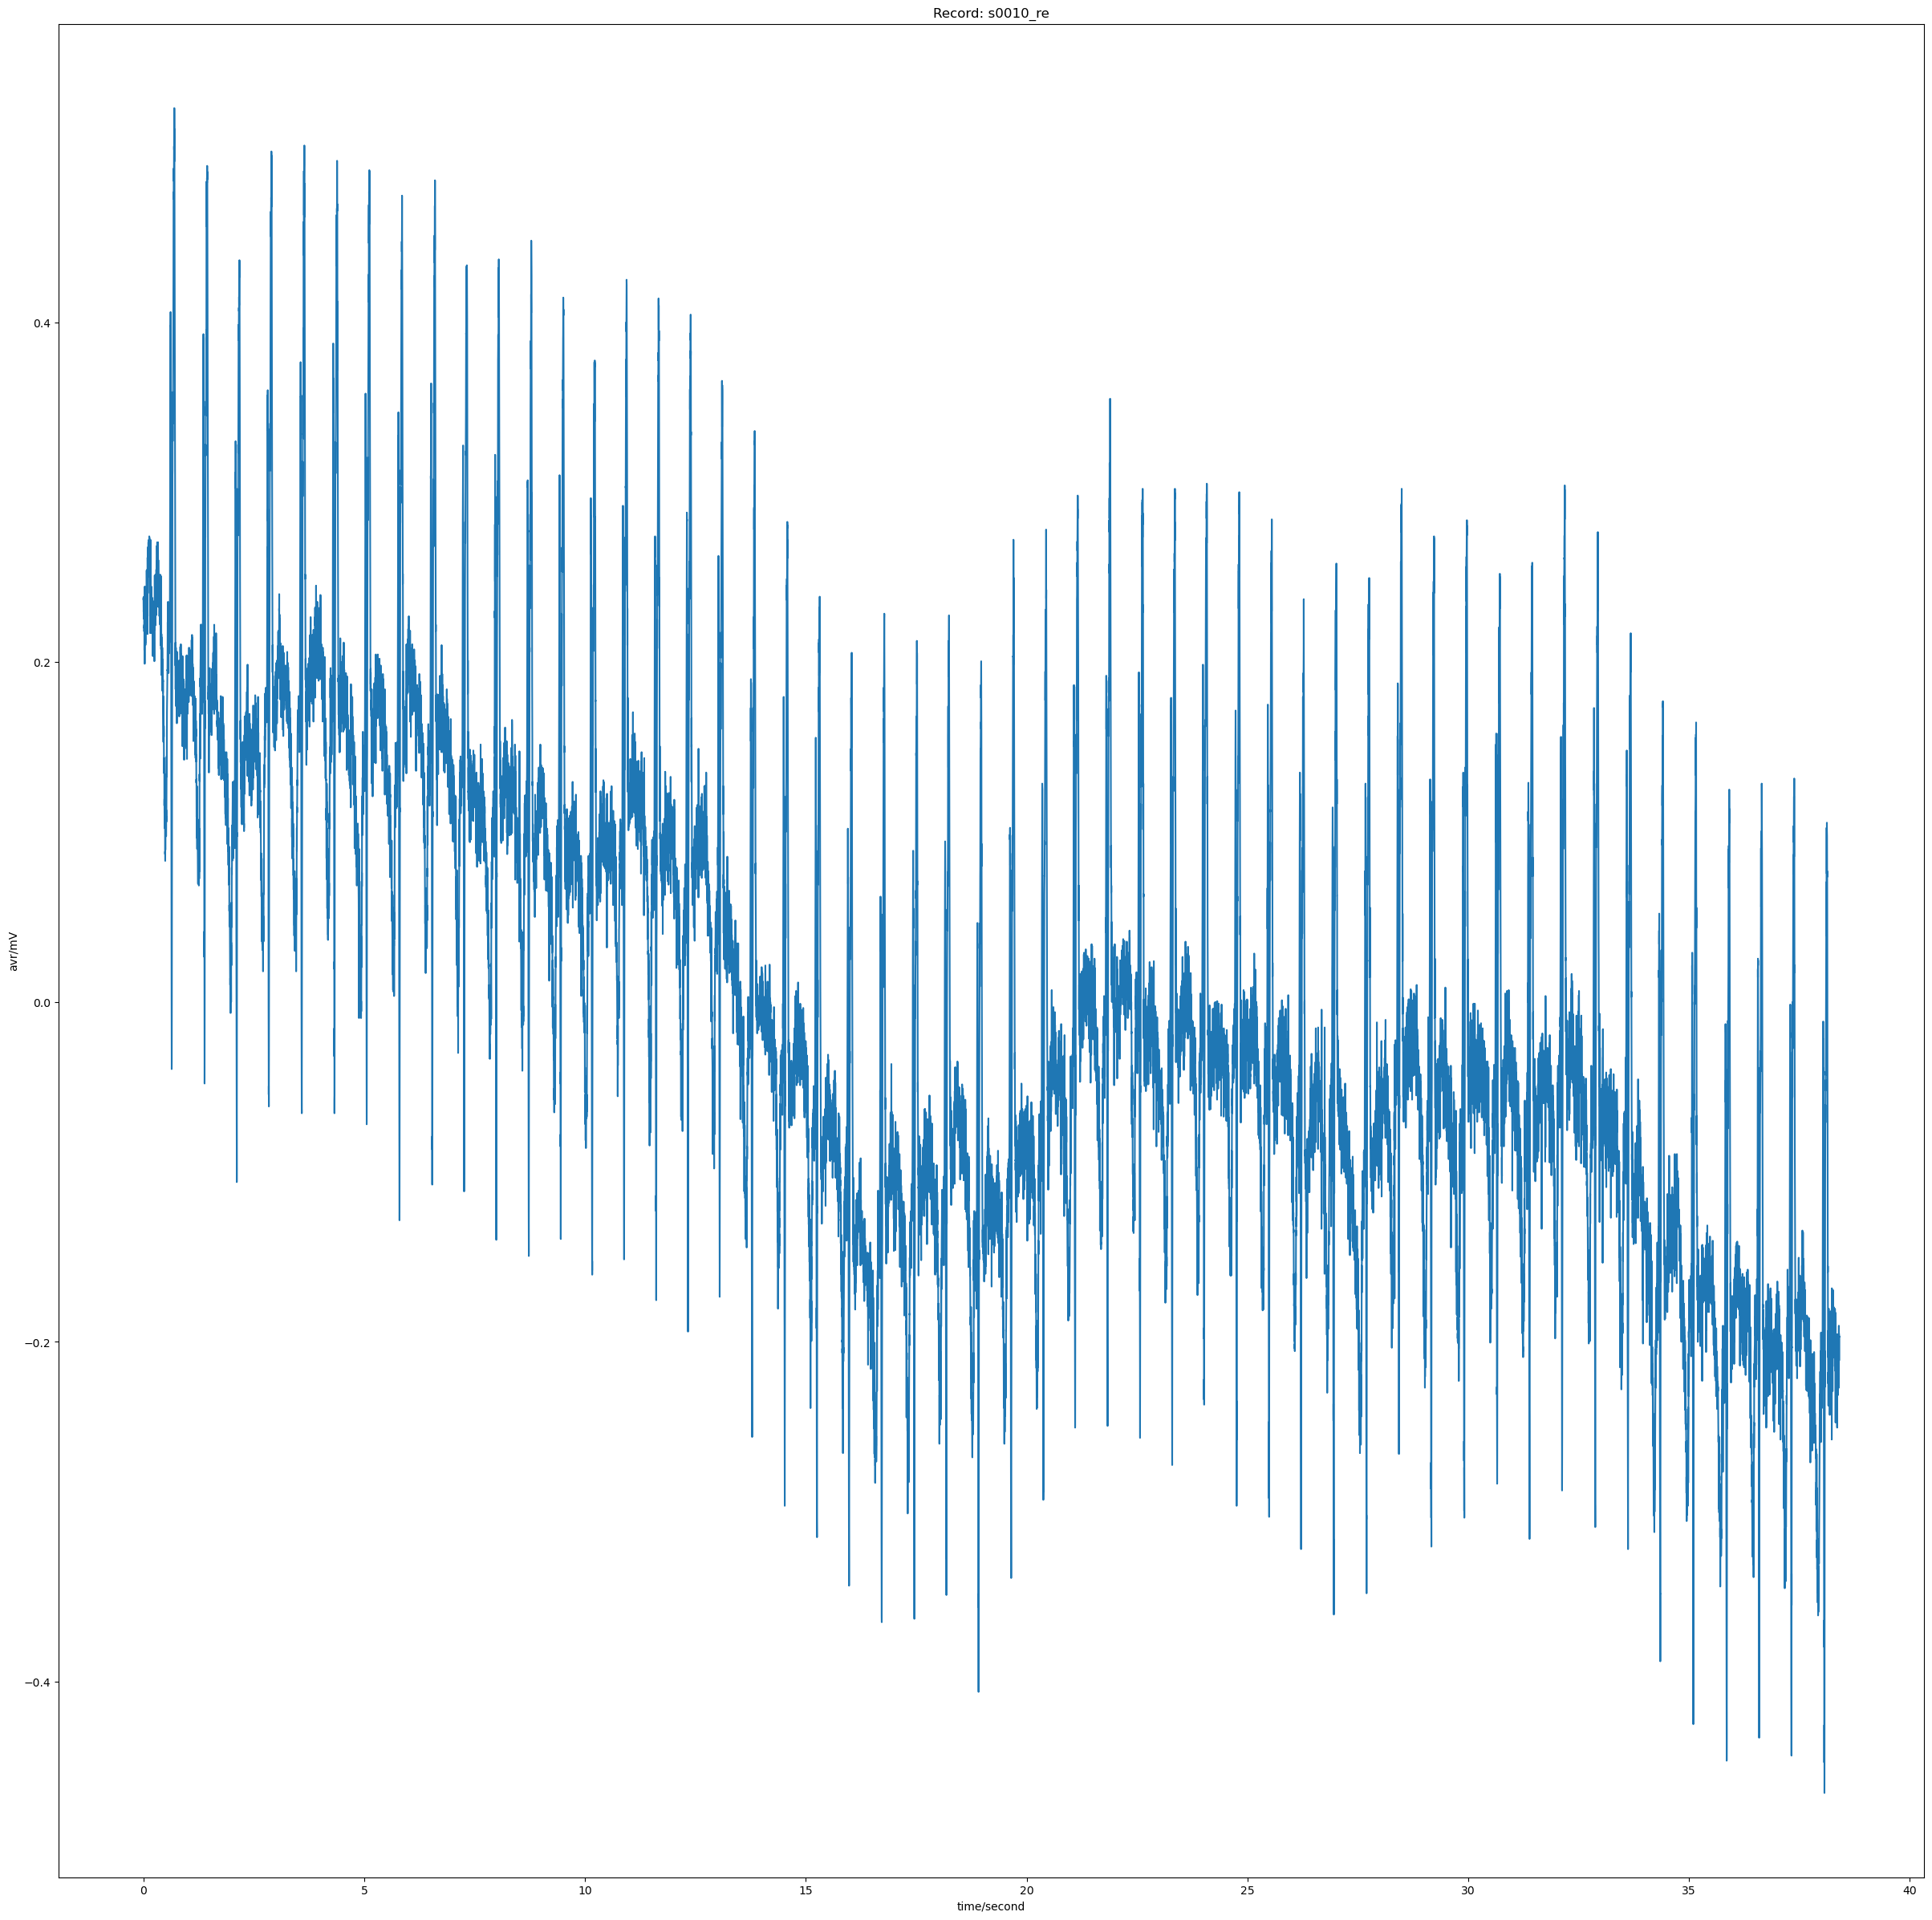

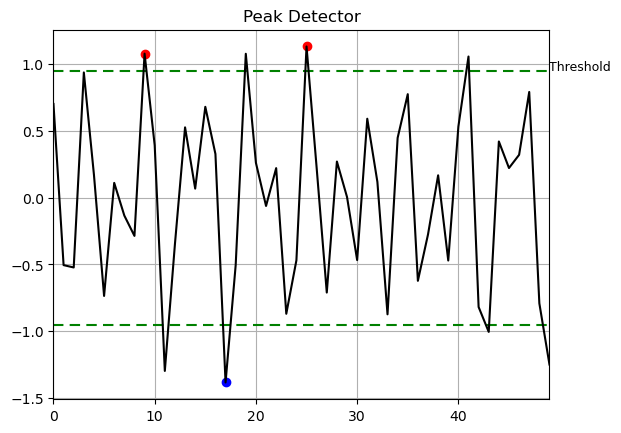

In [5]:
from math import sin,isnan
from pylab import *
import os
import wfdb
import matplotlib.pyplot as plt
os.chdir(r'E:/ptb-diagnostic-ecg-database-1.0.0/patient001')
record=wfdb.rdrecord('s0010_re',channels=[3])
wfdb.plot_wfdb(record,figsize=(30,30))
def peakdet(v, delta,thresh,x):
    delta=abs(delta)
    maxtab = []
    mintab = []

    v = asarray(v)

    mn, mx = v[0], v[0]
    mnpos, mxpos = NaN, NaN

    lookformax = True

    for i in arange(len(v)):
        this = v[i]
        if abs(this)>thresh:
            if this > mx:
                mx = this
                mxpos = x[i]
            if this < mn:
                mn = this
                mnpos = x[i]
            if lookformax:
                if (this < mx-delta):
                    if (mx>abs(thresh)) and not isnan(mxpos):
                        maxtab.append((mxpos, mx))
                    mn = this
                    mnpos = x[i]
                    lookformax = False
            else:
                if (this > mn+delta):
                    if (mn<-abs(thresh)) and not isnan(mnpos):
                        mintab.append((mnpos, mn))
                    mx = this
                    mxpos = x[i]
                    lookformax = True
    return array(maxtab), array(mintab)

#Input Signal
t=array(range(50))
series=0.3*sin(t)+0.7*cos(2*t)-0.5*sin(1.2*t)

thresh=0.95 #Threshold value
delta=0.0 #

a=zeros(len(t)) #
a[:]=thresh #

maxtab, mintab = peakdet(series,delta,thresh,t)

#Plotting output
scatter(array(maxtab)[:,0], array(maxtab)[:,1], color='red')
scatter(array(mintab)[:,0], array(mintab)[:,1], color='blue')
xlim([0,t[-1]])
title('Peak Detector')
grid(True)
plot(t,a,color='green',linestyle='--',dashes=(5,3))
plot(t,-a,color='green',linestyle='--',dashes=(5,3))
annotate('Threshold',xy=(t[-1],thresh),fontsize=9)
plot(t,series,'k')
show()


In [6]:
from math import sin
from matplotlib import pylab
from pylab import *

def peakdet(v, thresh):
    maxthresh = []
    minthresh = []
    peaks = []
    valleys = []

    for x, y in v:
        if y > thresh:
            maxthresh.append((x, y))
        elif y < -thresh:
            minthresh.append((x, y))

    for x, y in maxthresh:
        try:
            if (v[x - 1][1] < y) & (v[x + 1][1] < y):
                peaks.append((x, y))
        except Exception:
            pass

    for x, y in minthresh:
        try:
            if (v[x - 1][1] > y) & (v[x + 1][1] > y):
                valleys.append((x, y))
        except Exception:
            pass

    return peaks, valleys

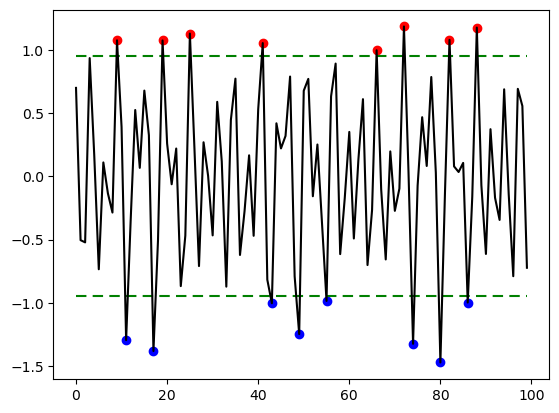

In [7]:
# input signal
t = array(range(100))
series = 0.3 * sin(t) + 0.7 * cos(2 * t) - 0.5 * sin(1.2 * t)

arr = [*zip(t, series)]  # create a list of tuples where the tuples represent the (x, y) values of the function
thresh = 0.95

peaks, valleys = peakdet(arr, thresh)

scatter([x for x, y in peaks], [y for x, y in peaks], color = 'red')
scatter([x for x, y in valleys], [y for x, y in valleys], color = 'blue')
plot(t, 100 * [thresh], color='green', linestyle='--', dashes=(5, 3))
plot(t, 100 * [-thresh], color='green', linestyle='--', dashes=(5, 3))
plot(t, series, 'k')
show()

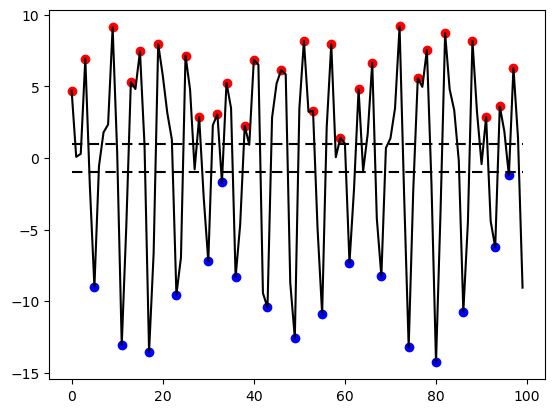

In [8]:
# input signal
t = array(range(100))
series = 6.3 * sin(t) + 4.7 * cos(2 * t) - 3.5 * sin(1.2 * t)

arr = [*zip(t, series)]
thresh = 0.95

peaks, valleys = peakdet(arr, thresh)

scatter([x for x, y in peaks], [y for x, y in peaks], color = 'red')
scatter([x for x, y in valleys], [y for x, y in valleys], color = 'blue')
plot(t, 100 * [thresh], color='black', linestyle='--', dashes=(5, 3))
plot(t, 100 * [-thresh], color='black', linestyle='--', dashes=(5, 3))
plot(t, series, 'k')
show()

In [9]:
 import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [10]:

# Specifications of the filter
f1 = 25  # Frequency of 1st signal
f2 = 50  # Frequency of 2nd signal
N = 10  # Order of the filter
  
  
# Generate the time vector of 1 sec duration
t = np.linspace(0, 1, 1000)  # Generate 1000 samples in 1 sec
  
# Generate the signal containing f1 and f2
sig = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

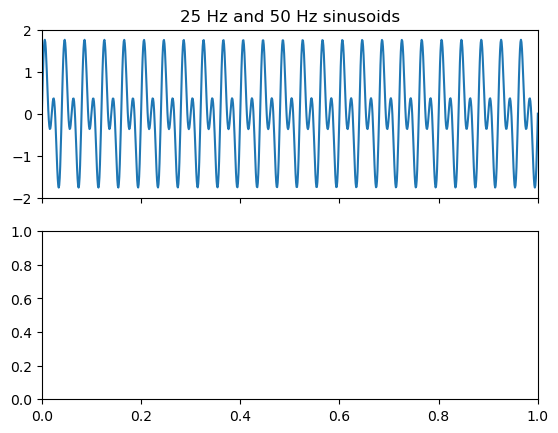

In [11]:

# Display the signal
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('25 Hz and 50 Hz sinusoids')
ax1.axis([0, 1, -2, 2])
  
# Design the Butterworth filter using 
# signal.butter and output='sos'
sos = signal.butter(50, 35, 'lp', fs=1000, output='sos')

In [12]:
# Filter the signal by the filter using signal.sosfilt
# Use signal.sosfiltfilt to get output inphase with input
filtered = signal.sosfiltfilt(sos, sig)
  
  
# Display the output signal
ax2.plot(t, filtered)
ax2.set_title('After 35 Hz Low-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

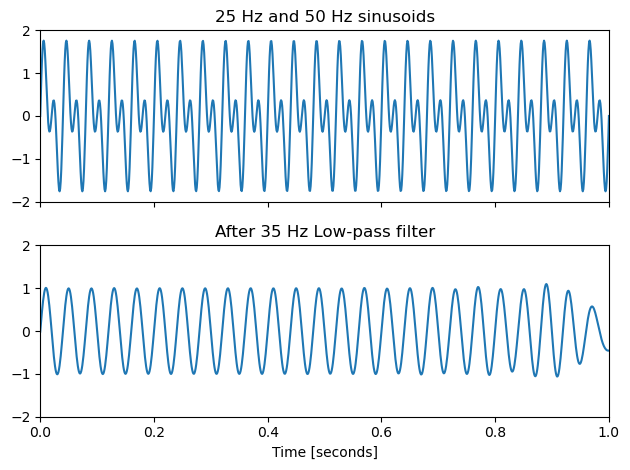

In [13]:
# import required library
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
  
# Given
f1 = 25  # Frequency of 1st signal
f2 = 50  # Frequency of 2nd signal
N = 10  # Order of the filter
  
# Generate the time vector of 1 sec duration
# START CODE HERE ### (≈ 1 line of code)
# Generate 1000 samples in 1 sec
t = np.linspace(0, 1, 1000)
  
# Generate the signal containing f1 and f2
# START CODE HERE ### (≈ 1 line of code)
sig = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
  
# Display the signal
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('25 Hz and 50 Hz sinusoids')
ax1.axis([0, 1, -2, 2])
  
# Design the Butterworth filter using signal.butter and output='sos'
# START CODE HERE ### (≈ 1 line of code)
sos = signal.butter(50, 35, 'lp', fs=1000, output='sos')
  
# Filter the signal by the filter using signal.sosfilt
# START CODE HERE ### (≈ 1 line of code)
# Use signal.sosfiltfilt to get output inphase with input
filtered = signal.sosfiltfilt(sos, sig)
  
  
# Display the output signal
ax2.plot(t, filtered)
ax2.set_title('After 35 Hz Low-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [14]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

In [15]:
# Specifications of Filter
  
 # sampling frequency
f_sample = 40000 
  
# pass band frequency
f_pass = 4000  
  
# stop band frequency
f_stop = 8000  
  
# pass band ripple
fs = 0.5
  
# pass band freq in radian
wp = f_pass/(f_sample/2)  
  
# stop band freq in radian
ws = f_stop/(f_sample/2) 
  
# Sampling Time
Td = 1  
  
 # pass band ripple
g_pass = 0.5 
  
# stop band attenuation
g_stop = 40  

In [16]:
# Conversion to prewrapped analog frequency
omega_p = (2/Td)*np.tan(wp/2)
omega_s = (2/Td)*np.tan(ws/2)
  
  
# Design of Filter using signal.buttord function
N, Wn = signal.buttord(omega_p, omega_s, g_pass, g_stop, analog=True)
  
  
# Printing the values of order & cut-off frequency!
print("Order of the Filter=", N)  # N is the order
# Wn is the cut-off freq of the filter
print("Cut-off frequency= {:.3f} rad/s ".format(Wn))
  
  
# Conversion in Z-domain
  
# b is the numerator of the filter & a is the denominator
b, a = signal.butter(N, Wn, 'low', True)
z, p = signal.bilinear(b, a, fs)
# w is the freq in z-domain & h is the magnitude in z-domain
w, h = signal.freqz(z, p, 512)

Order of the Filter= 9
Cut-off frequency= 0.226 rad/s 


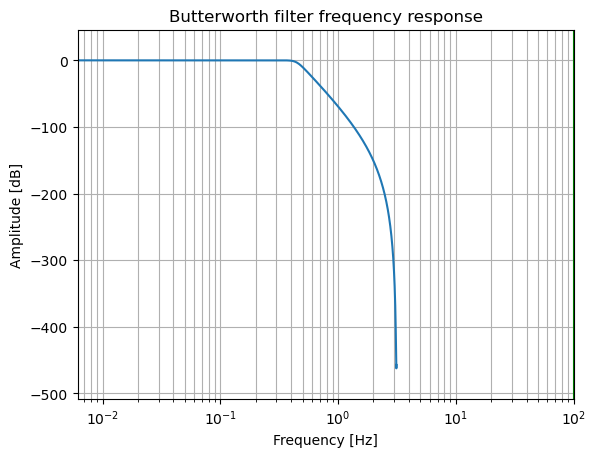

In [17]:

# Magnitude Response
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
 
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
 
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()

C:\Users\gky16\AppData\Local\Temp\ipykernel_12952\4280932133.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(0, 40), imp, markerfmt='D', use_line_collection=True)
C:\Users\gky16\AppData\Local\Temp\ipykernel_12952\4280932133.py:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(0, 40), response, use_line_collection=True)


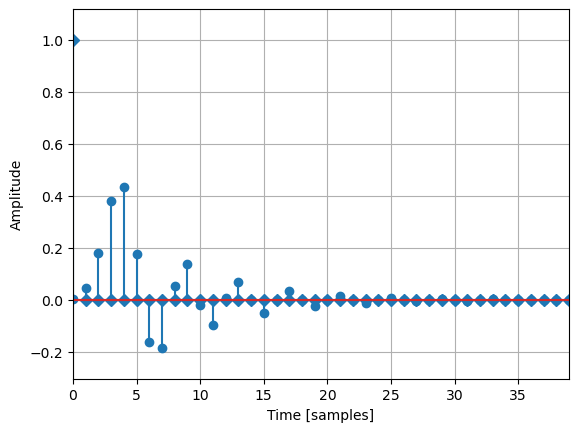

In [18]:
# Impulse response
imp = signal.unit_impulse(40)
c, d = signal.butter(N, 0.5)
response = signal.lfilter(c, d, imp)
 
# Illustrating impulse response
plt.stem(np.arange(0, 40), imp, markerfmt='D', use_line_collection=True)
plt.stem(np.arange(0, 40), response, use_line_collection=True)
plt.margins(0, 0.1)
 
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

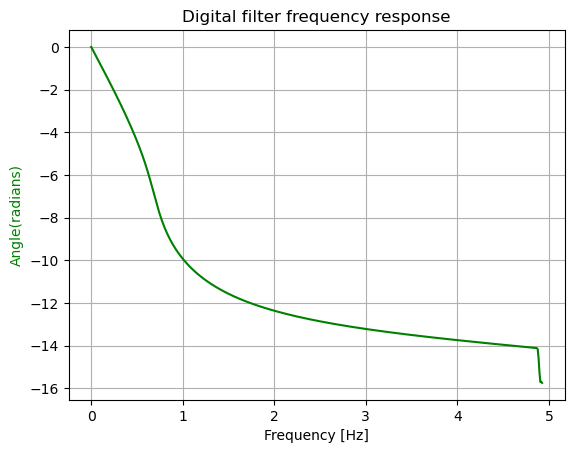

In [19]:
# Phase response
fig, ax1 = plt.subplots()
 
ax1.set_title('Digital filter frequency response')
ax1.set_ylabel('Angle(radians)', color='g')
ax1.set_xlabel('Frequency [Hz]')
 
angles = np.unwrap(np.angle(h))
ax1.plot(w/2*np.pi, angles, 'g')
ax1.grid()
ax1.axis('tight')
 
plt.show()

Order of the Filter= 12
Cut-off frequency= 0.585 rad/s 


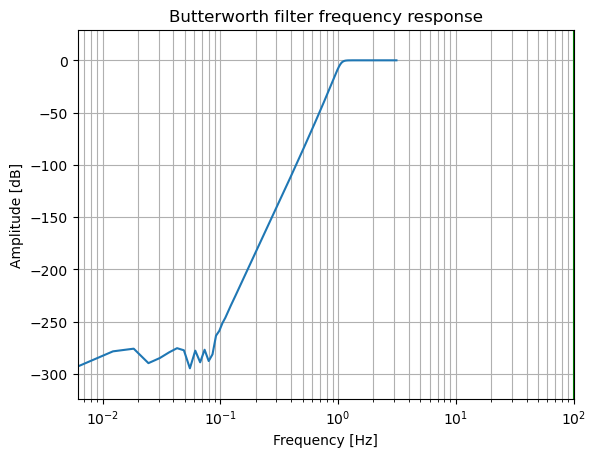

C:\Users\gky16\AppData\Local\Temp\ipykernel_12952\3954365689.py:78: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(0, 40),imp,markerfmt='D',use_line_collection=True)
C:\Users\gky16\AppData\Local\Temp\ipykernel_12952\3954365689.py:79: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(0,40), response,use_line_collection=True)


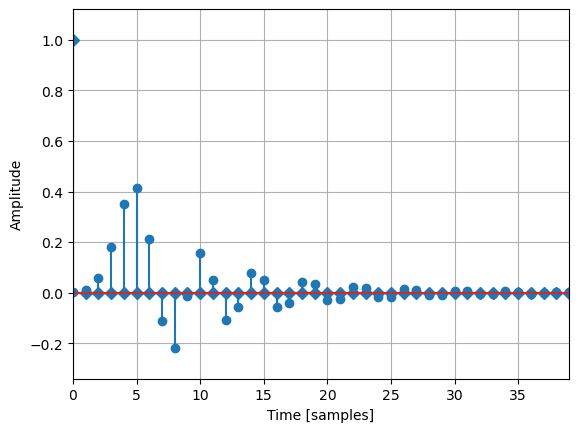

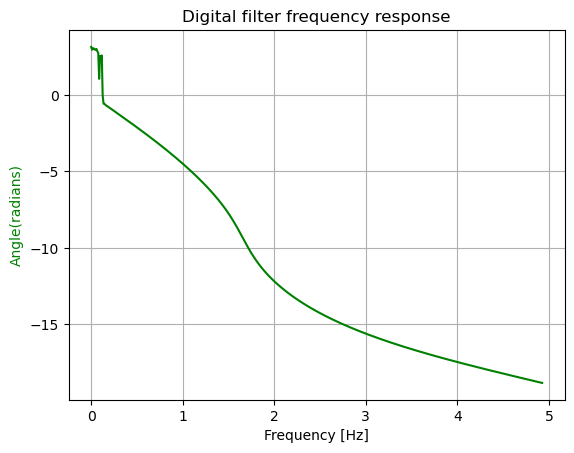

In [20]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
 
 
# Specifications of Filter
   
 # sampling frequency
f_sample = 3500
   
# pass band frequency
f_pass = 1050
   
# stop band frequency
f_stop = 600
   
# pass band ripple
fs = 0.5
   
# pass band freq in radian
wp = f_pass/(f_sample/2)  
   
# stop band freq in radian
ws = f_stop/(f_sample/2) 
   
# Sampling Time
Td = 1 
   
 # pass band ripple
g_pass = 1
   
# stop band attenuation
g_stop = 50
 
# Conversion to prewrapped analog frequency
omega_p = (2/Td)*np.tan(wp/2)
omega_s = (2/Td)*np.tan(ws/2)
   
   
# Design of Filter using signal.buttord function
N, Wn = signal.buttord(omega_p, omega_s, g_pass, g_stop, analog=True)
   
   
# Printing the values of order & cut-off frequency!
print("Order of the Filter=", N)  # N is the order
# Wn is the cut-off freq of the filter
print("Cut-off frequency= {:.3f} rad/s ".format(Wn))
   
   
# Conversion in Z-domain
   
# b is the numerator of the filter & a is the denominator
b, a = signal.butter(N, Wn, 'high', True)
z, p = signal.bilinear(b, a, fs)
 
# w is the freq in z-domain & h is the magnitude in z-domain
w, h = signal.freqz(z, p, 512)
 
 
# Magnitude Response
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()
 
 
# Impulse Response
imp = signal.unit_impulse(40)
c, d = signal.butter(N, 0.5)
response = signal.lfilter(c, d, imp)
plt.stem(np.arange(0, 40),imp,markerfmt='D',use_line_collection=True)
plt.stem(np.arange(0,40), response,use_line_collection=True)
plt.margins(0, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
 
 
# Phase Response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.set_ylabel('Angle(radians)', color='g')
ax1.set_xlabel('Frequency [Hz]')
angles = np.unwrap(np.angle(h))
ax1.plot(w/2*np.pi, angles, 'g')
ax1.grid()
ax1.axis('tight')
plt.show()

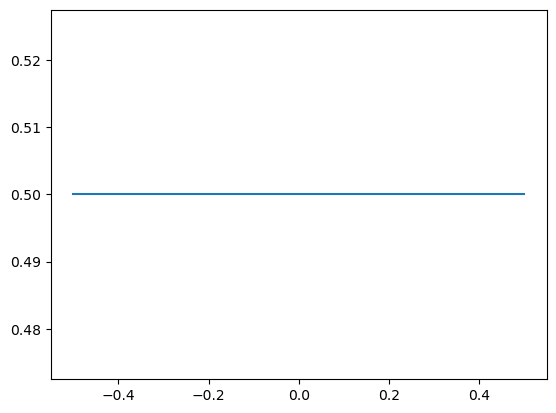

In [21]:
from scipy import signal
import numpy as np
from scipy.fftpack import fft

#Initialize Parameters
p_0 = 2
A = np.sqrt(1/(2*p_0))
t = [-A,A]


plt.plot(t,[A,A])
plt.show()

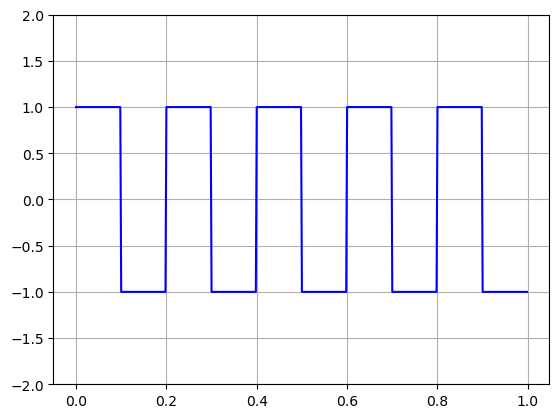

In [22]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t),'b')
plt.ylim(-2, 2)
plt.grid()
plt.show()

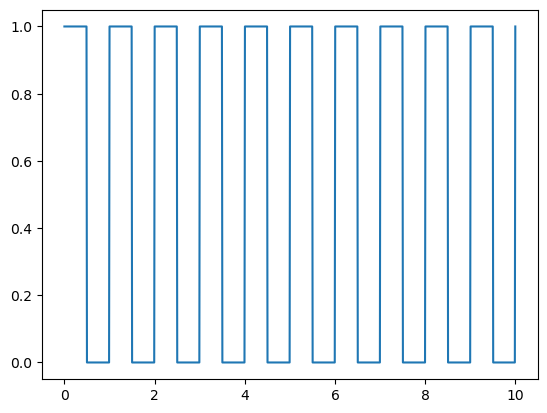

In [23]:
import math, numpy
from matplotlib import pyplot as plt

x = numpy.linspace(0, 10, 1000)
y = numpy.array([1 if math.floor(2 * t) % 2 == 0 else 0 for t in x])

plt.plot(x,y)
plt.show()

In [24]:
pip install biosppy


Note: you may need to restart the kernel to use updated packages.


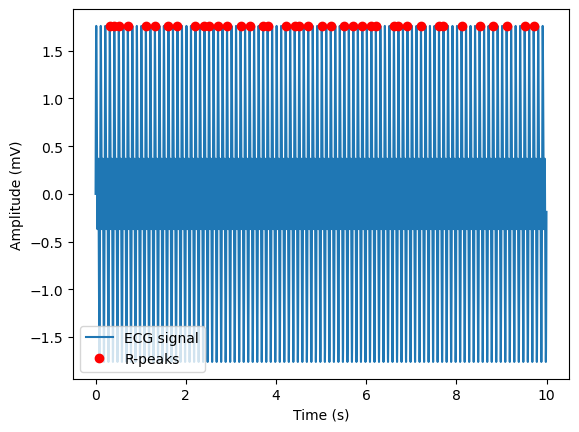

In [25]:
import biosppy.signals.ecg as ecg
import matplotlib.pyplot as plt
import numpy as np

# generate an example ECG signal
fs = 1000  # sampling rate (Hz)
t = np.arange(0, 10, 1/fs)
ecg_signal = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) 

# extract R-peaks using biosppy
out = ecg.christov_segmenter(signal=ecg_signal, sampling_rate=fs)
rpeaks = out['rpeaks']

# plot the ECG signal and R-peaks
plt.figure()
plt.plot(t, ecg_signal, label='ECG signal')
plt.plot(t[rpeaks], ecg_signal[rpeaks], 'ro', label='R-peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()

In [26]:
import biosppy.signals.ecg as ecg
import numpy as np

# generate an example ECG signal
fs = 1000  # sampling rate (Hz)
t = np.arange(0, 10, 1/fs)
ecg_signal = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

# initialize loop variables
i = 0  # index of current sample
n_samples = len(ecg_signal)
window_size = fs  # size of the ECG window to process
rpeaks = []  # list to store R-peak indices

# process the ECG signal in a while loop
while i < n_samples:
    # extract a window of ECG data to process
    window = ecg_signal[i:i+window_size]
    
    # extract R-peaks from the window using biosppy
    out = ecg.christov_segmenter(signal=window, sampling_rate=fs)
    rpeaks_in_window = out['rpeaks'] + i  # adjust R-peak indices for window
    
    # add the R-peaks to the list
    rpeaks.extend(rpeaks_in_window)
    
    # move to the next window
    i += window_size

# print the list of R-peaks
print(rpeaks)


[315, 515, 715, 1315, 1615, 1815, 2315, 2515, 2715, 3315, 3515, 3715, 4415, 4515, 4715, 5415, 5515, 5715, 6415, 6615, 6715, 7415, 7615, 7715, 8315, 8615, 8815, 9315, 9615, 9815]


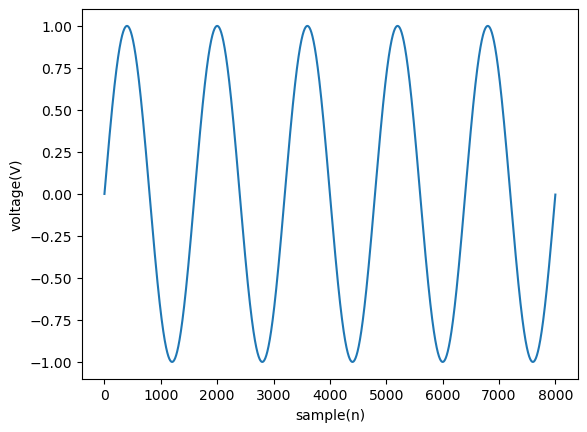

In [27]:
import matplotlib.pyplot as plt
import numpy as np


Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

In [28]:
pip install neurokit2

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd

In [30]:
# Retrieve ECG data from data folder
ecg_signal = nk.data(dataset="ecg_1000hz")
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1000)

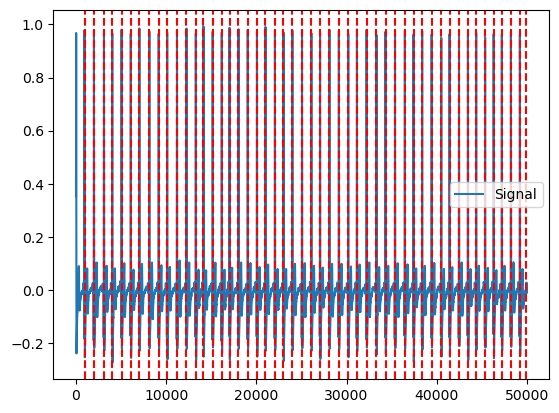

In [31]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

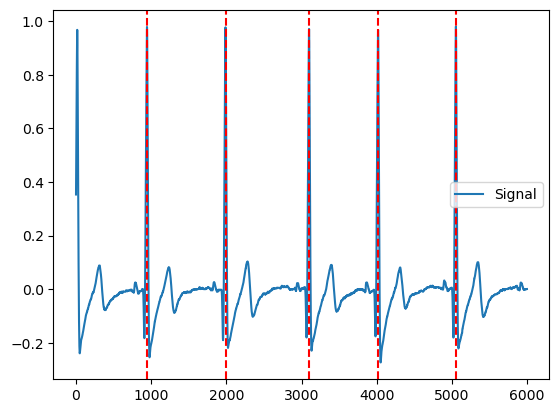

In [32]:
# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:6000])

# Locate other waves (P, Q, S, T) and their onset and offset
In ecg_delineate(), NeuroKit implements different methods to segment the QRS complexes. There are the derivative method and the other methods that make use of Wavelet to delineate the complexes.

Peak method
First, let’s take a look at the ‘peak’ method and its output.

In [33]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=1000, method="peak")

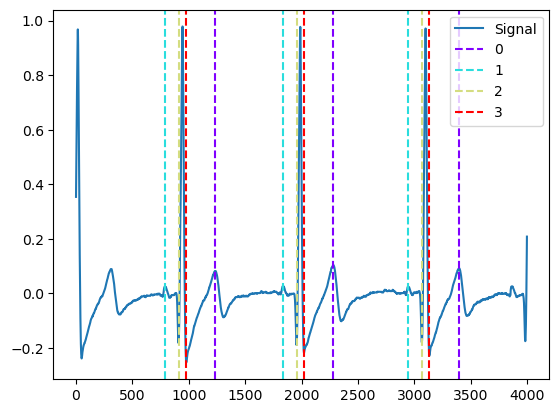

In [34]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:4000])

# Visually, the ‘peak’ method seems to have correctly identified the P-peaks, Q-peaks, S-peaks and T-peaks for this signal, at least, for the first few complexes. Well done, peak!

However, it can be quite tiring to be zooming in to each complex and inspect them one by one. To have a better overview of all complexes at once, you can make use of the show argument in ecg_delineate() as below.

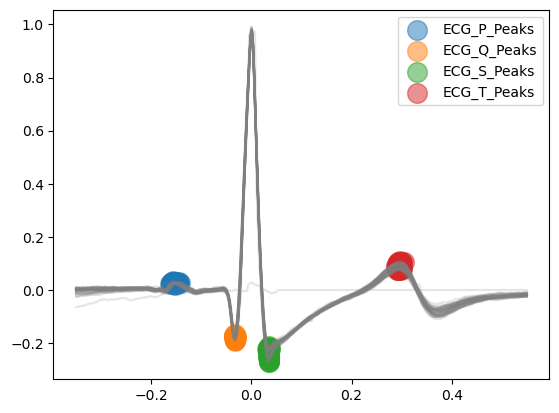

In [35]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

# The ‘peak’ method is doing a glamorous job with identifying all the ECG peaks for this piece of ECG signal.

On top of the above peaks, the peak method also identify the wave boundaries, namely the onset of P-peaks and offset of T-peaks. You can vary the argument show_type to specify the information you would like plot.

Let’s visualize them below

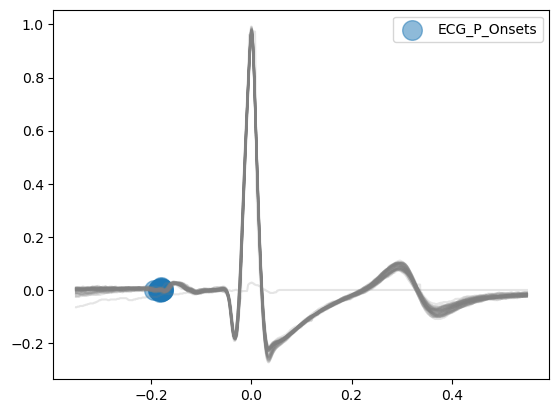

In [36]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg_signal, 
                                           rpeaks, 
                                           sampling_rate=1000,
                                           method="peak", 
                                           show=True, 
                                           show_type='bounds_P')

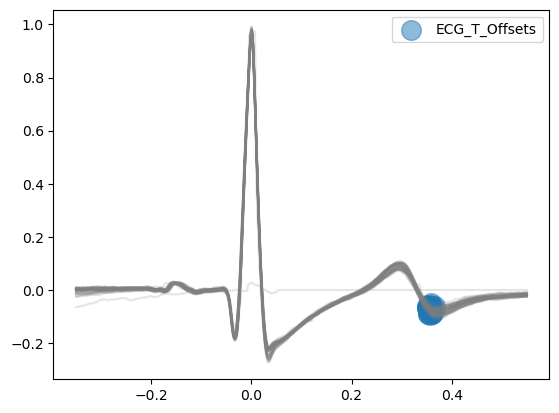

In [37]:
# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peaj, waves_peak = nk.ecg_delineate(ecg_signal, 
                                           rpeaks, 
                                           sampling_rate=1000, 
                                           method="peak", 
                                           show=True, 
                                           show_type='bounds_T')

# Both the onsets of P-peaks and the offsets of T-peaks appears to have been correctly identified here. This information will be used to delineate cardiac phases in ecg_phase().

Let’s next take a look at the continuous wavelet method.

Continuous Wavelet Method (CWT)

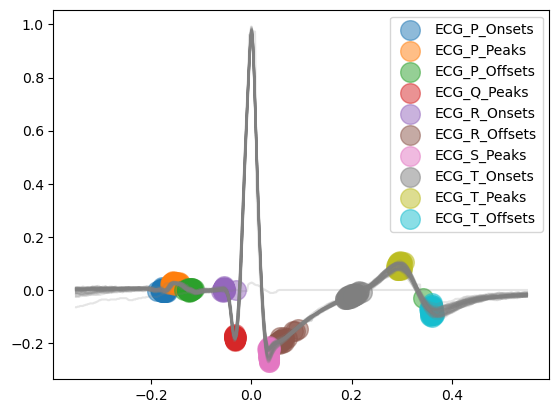

In [38]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='all')

# By specifying ‘all’ in the show_type argument, you can plot all delineated information output by the cwt method. However, it could be hard to evaluate the accuracy of the delineated information with everyhing plotted together. Let’s tease them apart!



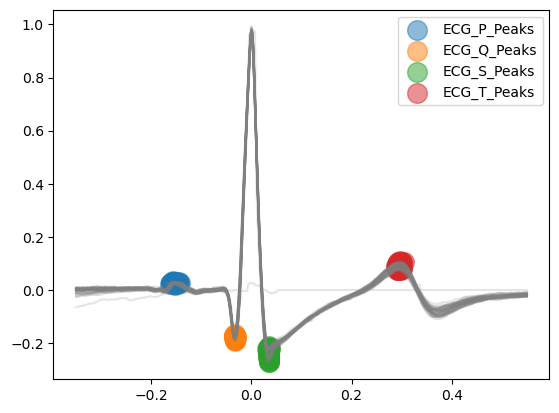

In [39]:
# Visualize P-peaks and T-peaks
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='peaks')

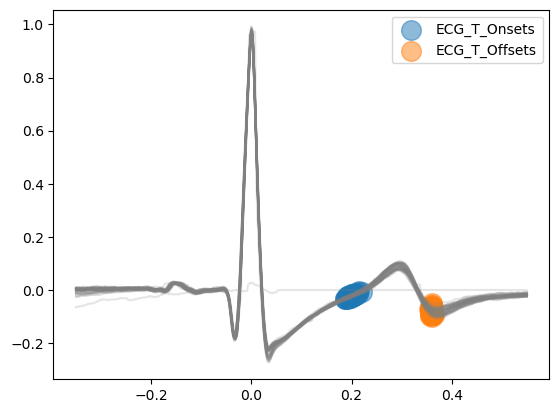

In [40]:
# Visualize T-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='bounds_T')

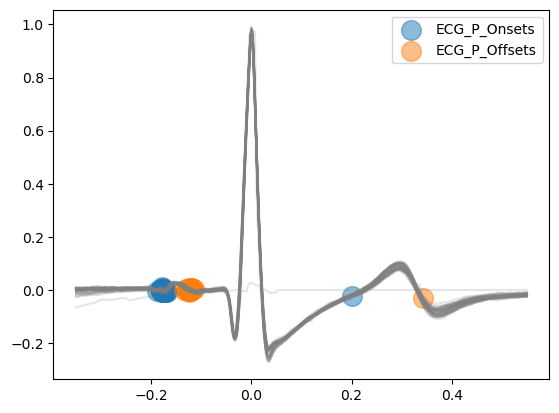

In [41]:
# Visualize P-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='bounds_P')

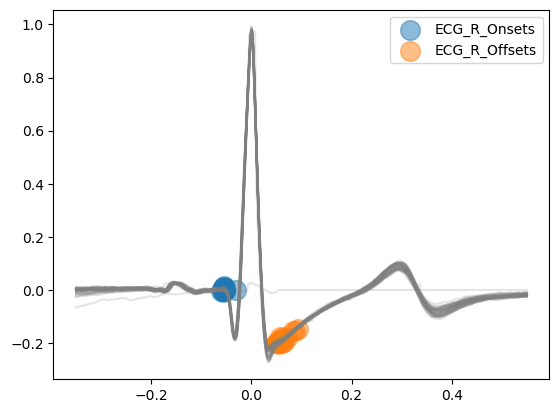

In [42]:
# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='bounds_R')

# Unlike the peak method, the continuous wavelet method does not idenfity the Q-peaks and S-peaks. However, it provides more information regarding the boundaries of the waves

Visually, except a few exception, CWT method is doing a great job. However, the P-waves boundaries are not very clearly identified here.

Last but not least, we will look at the third method in NeuroKit ecg_delineate() function: the discrete wavelet method.

Discrete Wavelet Method (DWT) - default method

C:\Users\gky16\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\gky16\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


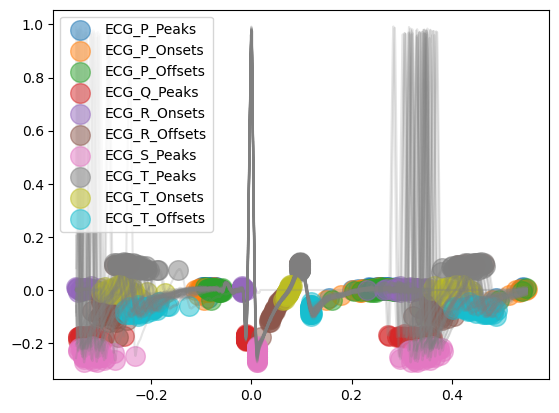

In [43]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='all')

C:\Users\gky16\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\gky16\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


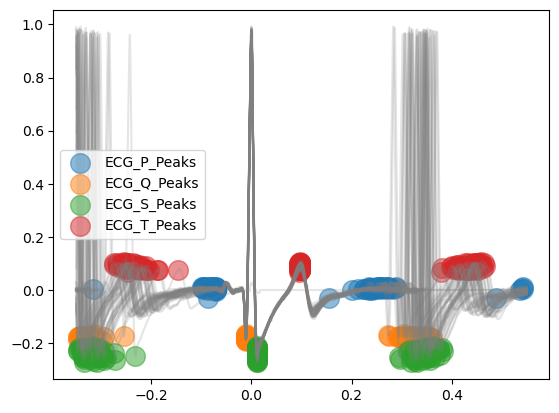

In [44]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='peaks')

C:\Users\gky16\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\gky16\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


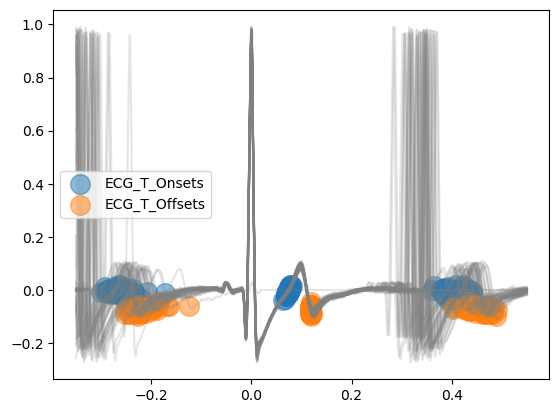

In [45]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_T')

C:\Users\gky16\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\gky16\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


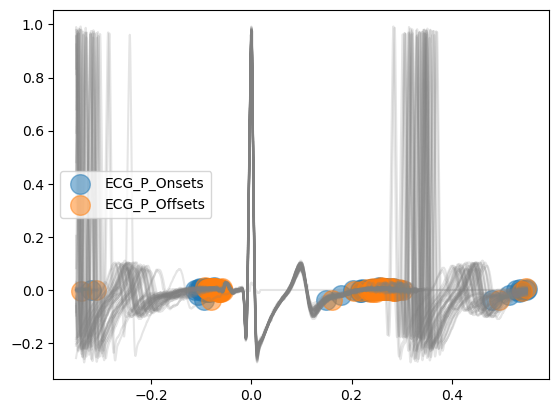

In [46]:
# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_P')

C:\Users\gky16\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\gky16\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


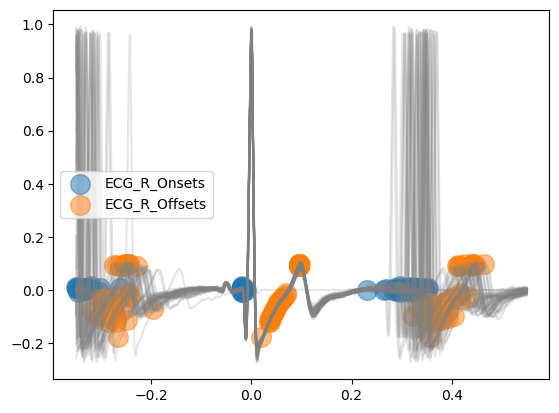

In [47]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_R')